## Data Acquisition

In [1]:
from sklearn import datasets, tree, metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

digits = datasets.load_digits()
raw_data = digits.images
target = digits.target

## Initial Data Analysis

In [2]:
print(f'Dataset type: {type(raw_data)}')
print(f'Target type: {type(target)}')
print(f'Dataset shape: {raw_data.shape}')
print(f'Target shape: {target.shape}')

Dataset type: <class 'numpy.ndarray'>
Target type: <class 'numpy.ndarray'>
Dataset shape: (1797, 8, 8)
Target shape: (1797,)


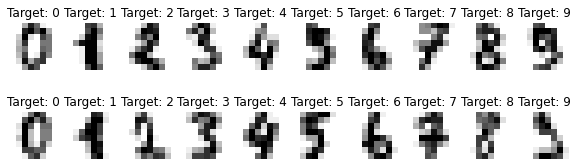

In [3]:
_, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes.reshape(-1), raw_data, target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('Target: %i' % label)



## Setup Experiment

### Preprocessing Data
Adapt the data to be manageable by the algorithms we want to use 

In [4]:
data = raw_data.reshape((len(raw_data), -1))
data.shape # first dimension as before, second and third have been reshaped

(1797, 64)

### Split data 2 ways
Create training, test, and validation data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, shuffle=True, stratify=target, random_state=42)

In [6]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1078, 64) (1078,) (719, 64) (719,)


## Training (Machine Learning)

In [7]:
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=1)

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Evaluation
* Classify data instances, that the classifier did __not__ see during the training phase
* Check how many are classified correctly

In [8]:
y_test_pred = clf.predict(X_test)

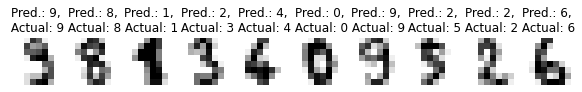

In [9]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction, actual in zip(axes, X_test, y_test_pred, y_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred.: {prediction},\n Actual: {actual}')

In [10]:
round(metrics.accuracy_score(y_test, y_test_pred),5)

0.84006

In [11]:
print(clf.get_depth())
print(clf.get_n_leaves())

13
123


In [12]:
accuracies=[]
for k in range(1,20):
    clf = tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=k)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    acc=metrics.accuracy_score(y_test, y_test_pred)
    print(k, acc)
    accuracies.append(acc)

1 0.1933240611961057
2 0.3157162726008345
3 0.48400556328233657
4 0.5841446453407511
5 0.6870653685674548
6 0.7579972183588317
7 0.8178025034770514
8 0.8164116828929068
9 0.8317107093184979
10 0.847009735744089
11 0.8386648122392212
12 0.8358831710709318
13 0.8400556328233658
14 0.8400556328233658
15 0.8400556328233658
16 0.8400556328233658
17 0.8400556328233658
18 0.8400556328233658
19 0.8400556328233658


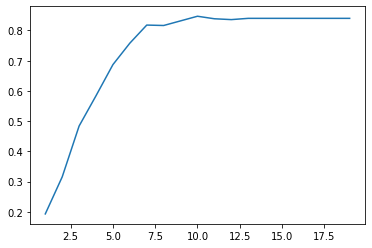

In [13]:
plt.plot(range(1,20), accuracies)

The best tree length in this case is 10. 

__NOTE__: This evaluation is preliminary (at best). To properly determine the best tree length we would usually use procedures with repetition (to smooth effects of random choices) and different datasets, i.e. different splits of the training data.